In [1]:
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torchinfo import summary

from diffusers import DDPMScheduler, UNet2DModel

%load_ext autoreload
%autoreload 2


In [2]:
DATA_PATH = 'New_dictionary'

In [3]:
noise_scheduler = DDPMScheduler(num_train_timesteps=10000, beta_schedule="sigmoid")
model = UNet2DModel(
    sample_size=64,  # Risoluzione input (es. 64x64 per test, 256x256 per serio)
    in_channels=1,   # 1 per MRI grayscale
    out_channels=1,
    layers_per_block=2,
    block_out_channels=(128, 256, 512, 512),
    down_block_types=("DownBlock2D", "DownBlock2D", "AttnDownBlock2D", "DownBlock2D"),
    up_block_types=("UpBlock2D", "AttnUpBlock2D", "UpBlock2D", "UpBlock2D"),
)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

In [4]:
output = model(torch.randn(1, 1, 64, 64), torch.tensor([0]))  # Test forward pass

In [5]:
output.sample

tensor([[[[-0.0688, -0.0353, -0.0112,  ...,  0.1216,  0.1980,  0.1432],
          [ 0.0679,  0.1967,  0.2505,  ...,  0.0437, -0.0566, -0.0134],
          [-0.0897,  0.0409,  0.3019,  ..., -0.1538,  0.4118,  0.2566],
          ...,
          [ 0.2552, -0.5732, -0.1052,  ...,  0.1124, -0.0396,  0.0973],
          [ 0.2413,  0.1991, -0.1293,  ...,  0.0546, -0.0734,  0.1101],
          [-0.0475,  0.1909, -0.1614,  ..., -0.2768,  0.2401,  0.1119]]]],
       grad_fn=<ConvolutionBackward0>)

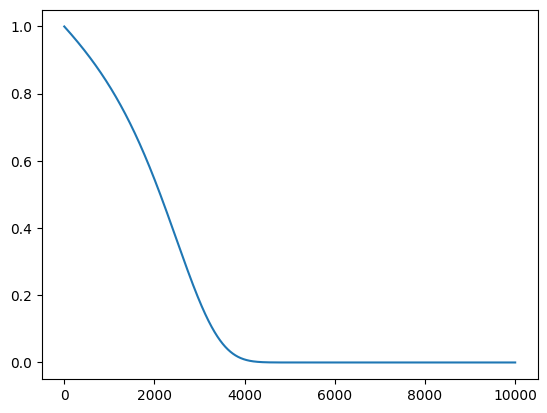

In [8]:

plt.plot(noise_scheduler.alphas_cumprod.cpu().numpy())